In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
import re
import nltk

pd.set_option('display.max_colwidth',200)

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/5spiNsJ_c9/
7916,7917,0,"We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life February 23, 2017 at 0…"
7917,7918,0,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!
7918,7919,0,"Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/"


In [4]:
test.shape

(1953, 2)

In [5]:
train.isna().any()

id       False
label    False
tweet    False
dtype: bool

In [6]:
test.isna().any()

id       False
tweet    False
dtype: bool

In [7]:
train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [8]:
train[train['label']==0].head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
6,7,0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/


In [9]:
train[train['label']==1].head()

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones
10,11,1,hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.
11,12,1,Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade
12,13,1,Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo


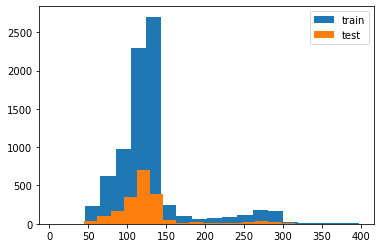

In [10]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=20,label='train')
plt.hist(length_test,bins=20,label='test')
plt.legend()
plt.show()

In [11]:
combi=train.append(test,ignore_index=True)
combi.shape

C:\Users\sanka\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(9873, 3)

In [12]:
combi.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [13]:
a=[]
for i in range(len(combi)):
    a.append(re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', combi['tweet'][i]))
combi['tidy_tweet']=a
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect...
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old. Thanks for rushing your products to market #Samsung... http://gizmodo.com/samsung-galaxy-note-7-explodes-burns-6-year-old-repor-1786523345 …","#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old. Thanks for rushing your products to market #Samsung... …"
9869,9870,NaN,Now Available - Hoodie. Check it out here - http://zetasupplies.co.uk/products/hoodie-2?utm_campaign=social_autopilot&utm_source=tweet&utm_medium=tweet … #iPhone #case #music #discount,Now Available - Hoodie. Check it out here - … #iPhone #case #music #discount
9870,9871,NaN,"There goes a crack right across the screen. If you could actually provide a more durable screen, that would be great #Apple #Iphone","There goes a crack right across the screen. If you could actually provide a more durable screen, that would be great #Apple #Iphone"
9871,9872,NaN,@codeofinterest as i said #Adobe big time we may well as include #apple to,@codeofinterest as i said #Adobe big time we may well as include #apple to


In [14]:
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("[^a-zA-Z#]",' ')
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I m wired I know I m George I was made that way #iphone #cute #daventry #home
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple won t even talk to me about a question I have unless I pay them for their stupid support
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old. Thanks for rushing your products to market #Samsung... http://gizmodo.com/samsung-galaxy-note-7-explodes-burns-6-year-old-repor-1786523345 …",#SamsungGalaxyNote Explodes Burns Year Old Thanks for rushing your products to market #Samsung
9869,9870,NaN,Now Available - Hoodie. Check it out here - http://zetasupplies.co.uk/products/hoodie-2?utm_campaign=social_autopilot&utm_source=tweet&utm_medium=tweet … #iPhone #case #music #discount,Now Available Hoodie Check it out here #iPhone #case #music #discount
9870,9871,NaN,"There goes a crack right across the screen. If you could actually provide a more durable screen, that would be great #Apple #Iphone",There goes a crack right across the screen If you could actually provide a more durable screen that would be great #Apple #Iphone
9871,9872,NaN,@codeofinterest as i said #Adobe big time we may well as include #apple to,codeofinterest as i said #Adobe big time we may well as include #apple to


In [15]:
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally transparant silicon case Thanks uncle #yay #Sony #Xperia #sonyexperias
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this Would #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know George made that #iphone #cute #daventry #home
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple even talk about question have unless them their stupid support
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old. Thanks for rushing your products to market #Samsung... http://gizmodo.com/samsung-galaxy-note-7-explodes-burns-6-year-old-repor-1786523345 …",#SamsungGalaxyNote Explodes Burns Year Thanks rushing your products market #Samsung
9869,9870,NaN,Now Available - Hoodie. Check it out here - http://zetasupplies.co.uk/products/hoodie-2?utm_campaign=social_autopilot&utm_source=tweet&utm_medium=tweet … #iPhone #case #music #discount,Available Hoodie Check here #iPhone #case #music #discount
9870,9871,NaN,"There goes a crack right across the screen. If you could actually provide a more durable screen, that would be great #Apple #Iphone",There goes crack right across screen could actually provide more durable screen that would great #Apple #Iphone
9871,9872,NaN,@codeofinterest as i said #Adobe big time we may well as include #apple to,codeofinterest said #Adobe time well include #apple


In [16]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [17]:
tokenized_words=combi['tidy_tweet'].apply(lambda x:x.split())


In [18]:
tokenized_words=tokenized_words.apply(lambda x:[ps.stem(i) for i in x])


In [19]:
' '.join(tokenized_words[0])

'#fingerprint #pregnanc test #android #app #beauti #cute #health #iger #iphoneonli #iphonesia #iphon'

In [20]:
for i in range(len(tokenized_words)):
    tokenized_words[i]=' '.join(tokenized_words[i])
combi['tidy_tweet']=tokenized_words
combi

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #pregnanc test #android #app #beauti #cute #health #iger #iphoneonli #iphonesia #iphon
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,final transpar silicon case thank uncl #yay #soni #xperia #sonyexperia
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love thi would #talk #makememori #unplug #relax #iphon #smartphon #wifi #connect
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wire know georg made that #iphon #cute #daventri #home
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amaz servic appl even talk about question have unless them their stupid support
...,...,...,...,...
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old. Thanks for rushing your products to market #Samsung... http://gizmodo.com/samsung-galaxy-note-7-explodes-burns-6-year-old-repor-1786523345 …",#samsunggalaxynot explod burn year thank rush your product market #samsung
9869,9870,NaN,Now Available - Hoodie. Check it out here - http://zetasupplies.co.uk/products/hoodie-2?utm_campaign=social_autopilot&utm_source=tweet&utm_medium=tweet … #iPhone #case #music #discount,avail hoodi check here #iphon #case #music #discount
9870,9871,NaN,"There goes a crack right across the screen. If you could actually provide a more durable screen, that would be great #Apple #Iphone",there goe crack right across screen could actual provid more durabl screen that would great #appl #iphon
9871,9872,NaN,@codeofinterest as i said #Adobe big time we may well as include #apple to,codeofinterest said #adob time well includ #appl


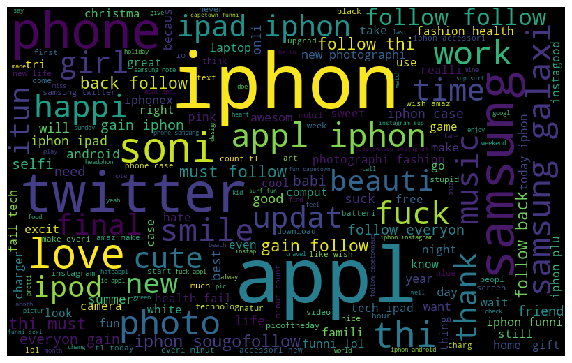

In [21]:
from wordcloud import WordCloud
all_words=' '.join([text for text in combi['tidy_tweet']])
wordcloud=WordCloud(height=500,width=800,max_font_size=110,random_state=21).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

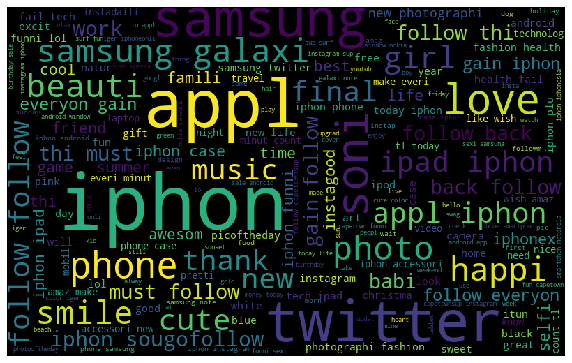

In [22]:
normal_words=' '.join([text for text in combi[combi['label']==0]['tidy_tweet']])
wordcloud=WordCloud(height=500,width=800,max_font_size=110,random_state=21).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

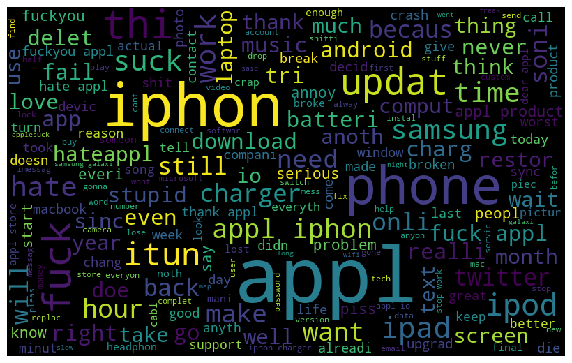

In [23]:
negative_words=' '.join([text for text in combi[combi['label']==1]['tidy_tweet']])
wordcloud=WordCloud(height=500,width=800,max_font_size=110,random_state=21).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
def extract_hashtag(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

In [25]:
Ht_regular=extract_hashtag(combi[combi['label']==0]['tidy_tweet'])
Ht_negative=extract_hashtag(combi[combi['label']==1]['tidy_tweet'])
Ht_regular=sum(Ht_regular,[])
Ht_negative=sum(Ht_negative,[])

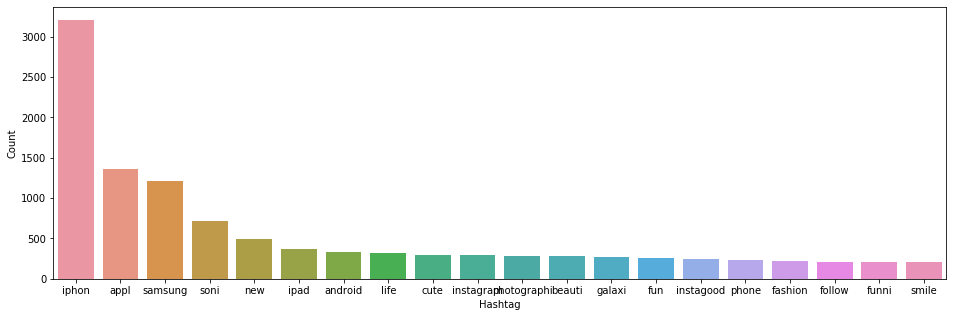

In [26]:
a=nltk.FreqDist(Ht_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

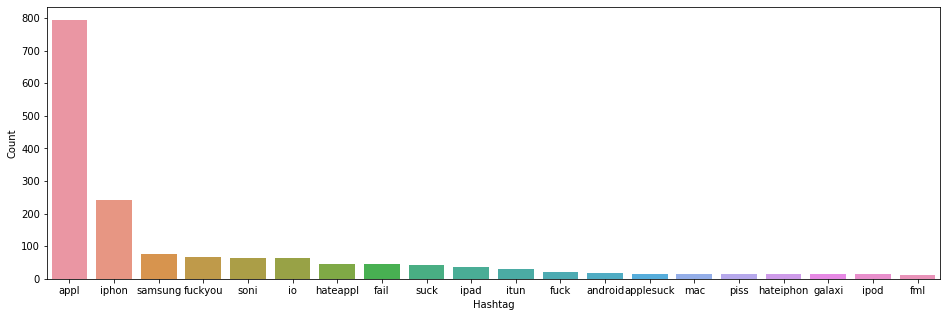

In [27]:
b=nltk.FreqDist(Ht_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e=e.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x='Hashtag',y='Count')
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [32]:
bow_vectorizer=CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])


In [31]:
bow1

,0
0,"(0, 864)\t1\n (0, 19)\t1\n (0, 28)\t1\n (0, 61)\t1\n (0, 188)\t1\n (0, 372)\t1\n (0, 398)\t1\n (0, 434)\t1\n (0, 436)\t1\n (0, 431)\t1"
1,"(0, 281)\t1\n (0, 128)\t1\n (0, 867)\t1\n (0, 988)\t1\n (0, 787)\t1\n (0, 986)\t1"
2,"(0, 431)\t1\n (0, 503)\t1\n (0, 870)\t1\n (0, 856)\t1\n (0, 697)\t1\n (0, 776)\t1\n (0, 962)\t1\n (0, 166)\t1"
3,"(0, 188)\t1\n (0, 431)\t1\n (0, 465)\t1\n (0, 383)\t1"
4,"(0, 856)\t1\n (0, 15)\t1\n (0, 744)\t1\n (0, 30)\t1\n (0, 676)\t1\n (0, 831)\t1\n (0, 843)\t1"
...,...
9868,"(0, 867)\t1\n (0, 990)\t1\n (0, 723)\t1\n (0, 520)\t1\n (0, 661)\t1\n (0, 718)\t1"
9869,"(0, 431)\t1\n (0, 128)\t1\n (0, 559)\t1\n (0, 141)\t1\n (0, 48)\t1\n (0, 217)\t1"
9870,"(0, 431)\t1\n (0, 30)\t1\n (0, 731)\t2\n (0, 340)\t1\n (0, 5)\t1\n (0, 710)\t1\n (0, 353)\t1\n (0, 667)\t1\n (0, 180)\t1"
9871,"(0, 30)\t1\n (0, 877)\t1\n (0, 721)\t1"


In [34]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(9873, 1000)

# LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

BOW

In [38]:
train_bow=bow[:7920,:]
test_bow=bow[7920:,:]

xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],test_size=0.3,random_state=42)


In [39]:
lreg=LogisticRegression()
lreg.fit(xtrain_bow,ytrain)

C:\Users\sanka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
prediction=lreg.predict_proba(xvalid_bow)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.777394900068918

In [41]:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('lreg_bow.csv',index=False)

TFIDF

In [42]:
train_tfidf=tfidf[:7920,:]
test_tfidf=tfidf[7920:,:]
xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]

In [43]:
lreg.fit(xtrain_tfidf,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
prediction=lreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.7994409503843465

In [45]:
test_pred=lreg.predict_proba(test_tfidf)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('lreg_tfidf.csv',index=False)

# SVM

In [46]:
from sklearn.svm import SVC

BOW

In [47]:
svc=SVC(kernel='linear',C=1,probability=True)
svc.fit(xtrain_bow,ytrain)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
prediction=svc.predict_proba(xvalid_bow)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.7581227436823106

In [49]:
test_pred=svc.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('svc_bow.csv',index=False)

TFIDF

In [50]:
svc=SVC(kernel='linear',C=1,probability=True)
svc.fit(xtrain_tfidf,ytrain)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
prediction=svc.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.7785039941902687

In [52]:
test_pred=svc.predict_proba(test_tfidf)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('svc_tfidf.csv',index=False)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

BOW

In [54]:
rf=RandomForestClassifier(n_estimators=400,random_state=11)
rf.fit(xtrain_bow,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [55]:
prediction=rf.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.7635782747603834

In [56]:
test_pred=rf.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('rf_bow.csv',index=False)

TFIDF

In [57]:
rf=RandomForestClassifier(n_estimators=400,random_state=21)
rf.fit(xtrain_tfidf,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [58]:
prediction=rf.predict(xvalid_tfidf)
f1_score(yvalid,prediction)

0.7432432432432433

In [59]:
test_pred=rf.predict(test_tfidf)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('rf_tfidf.csv',index=False)

# XGBoost

In [60]:
from xgboost import XGBClassifier

C:\Users\sanka\Anaconda3\lib\site-packages\distributed\utils.py:138: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,


BOW

In [61]:
xgb=XGBClassifier(max_depth=6,n_estimators=1000)
xgb.fit(xtrain_bow,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
prediction=xgb.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.7502008032128513

In [63]:
test_pred=xgb.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('xgb_bow.csv',index=False)

TFIDF

In [64]:
xgb=XGBClassifier(n_estimators=1000,max_depth=6)
xgb.fit(xtrain_tfidf,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
prediction=xgb.predict(xvalid_tfidf)
f1_score(yvalid,prediction)

0.7341977309562399

In [66]:
test_pred=xgb.predict(test_tfidf)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('xgb_tfidf.csv',index=False)